This is my data challenge for Week 7 of the Insight Data Science Program.

<b><u>The Goal</b></u>

You belong to the people analytics team for a food conglomerate. Employee turnover has been rampant for your 10 subsidiaries. The CFO estimates that the cost of replacing an employee is often larger than 100K USD, taking into account the time spent to interview and find a replacement, placement fees, sign-on bonuses and the loss of productivity for several months.
    
Your team has been tasked with diagnosing why and when employees from your subsidiaries leave. You need a tangible data-driven recommendation for each of the ten Presidents of your subsidiaries. What are your recommendations and why?

<b><u>Challenge Description</u></b>

We got employee data from a few companies. We have data about all employees who joined from 2011/01/24 to 2015/12/13. For each employee, we also know if they are still at the company as of 2015/12/13 or they have quit. Beside that, we have general info about the employee, such as average salary during her tenure, department, and years of experience. As said above, the goal is to predict employee retention and understand its main drivers

<b><u>Data Description</b></u>

The table is:
"<b>employee_retention</b>" - comprehensive information about employees. The columns are:

<b>employee_id</b>: id of the employee. Unique by employee per company   
<b>company_id</b>: company id.   
<b>dept</b>: employee department   
<b>seniority</b>: number of yrs of work experience when hired   
<b>salary</b>: average yearly salary of the employee during her tenure within the company   
<b>join_date</b>: when the employee joined the company, it can only be between 2011/01/24 and 2015/12/13   
<b>quit_date</b>: when the employee left her job (if she is still employed as of 2015/12/13, this field is NA)   

<b><u>The Approach</b></u>


# Load packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Load Data & Fix Column Types

In [2]:
emp_data = pd.read_csv('employee_retention_data.csv')
emp_data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [3]:
print('Number of employees in the dataset is: {}.'.format(emp_data.shape[0]))

Number of employees in the dataset is: 24702.


Let's check the data types of each of our columns.

In [4]:
emp_data.dtypes

employee_id    float64
company_id       int64
dept            object
seniority        int64
salary         float64
join_date       object
quit_date       object
dtype: object

All looks good except for the join_date and quit_data, which should be datetime objects. Let's convert them.

In [5]:
emp_data['join_date'] = pd.to_datetime(emp_data['join_date'])
emp_data['quit_date'] = pd.to_datetime(emp_data['quit_date'])

Is there any missing data in our data?

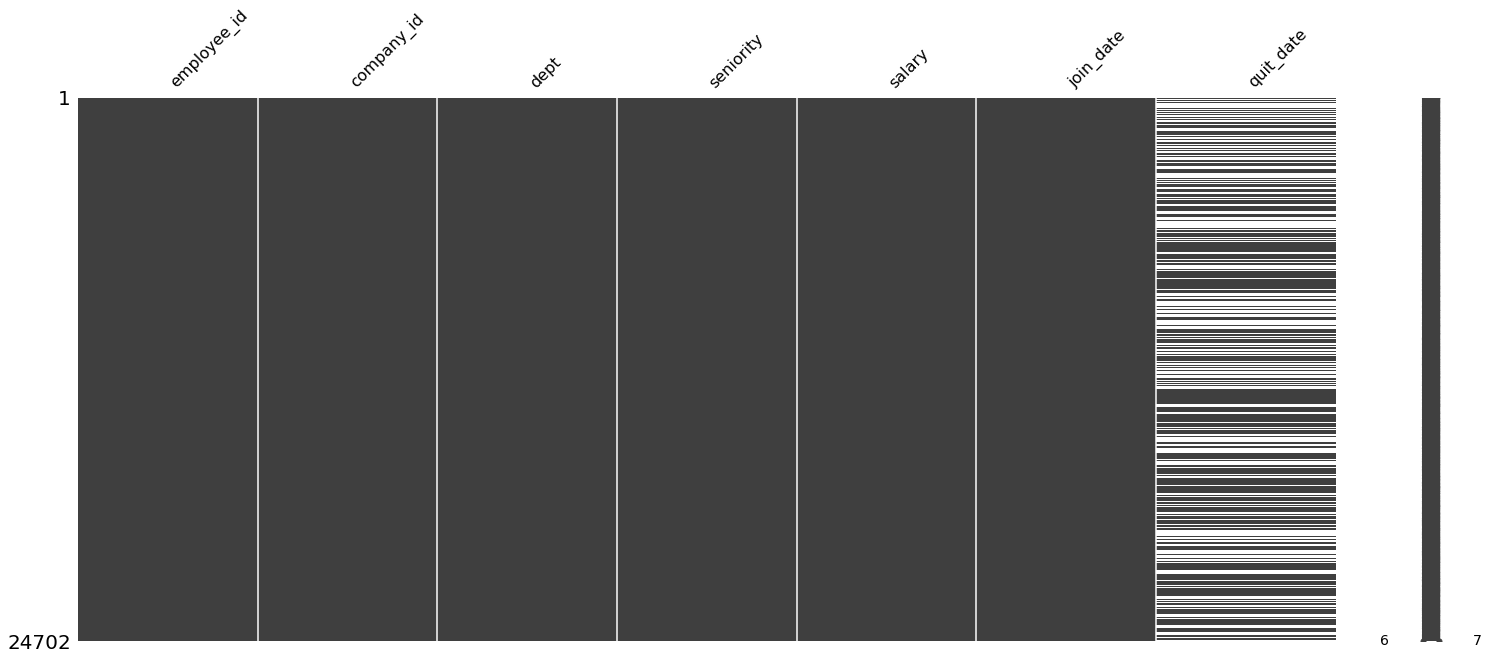

In [44]:
missingno.matrix(emp_data)

I don't think there is any missing data (the blanks for the quit date are for employees who haven't left yet).

Are there any duplicates in our dataset?

In [48]:
emp_data.duplicated().sum()

0

There are no duplicates in our dataset.

# EDA

How many employees are there in each subsidiary?

In [31]:
for id, num_employees in enumerate(emp_data.groupby('company_id').size()):
    print('Company {} has {} employees.'.format(id+1, num_employees))

Company 1 has 8486 employees.
Company 2 has 4222 employees.
Company 3 has 2749 employees.
Company 4 has 2062 employees.
Company 5 has 1755 employees.
Company 6 has 1291 employees.
Company 7 has 1224 employees.
Company 8 has 1047 employees.
Company 9 has 961 employees.
Company 10 has 865 employees.
Company 11 has 16 employees.
Company 12 has 24 employees.


How many departments are there?

In [32]:
print('The unique departments in the dataset are:')
print('------------------------------------------')
for dept in emp_data.dept.unique():
    print(dept)

The unique departments in the dataset are:
------------------------------------------
customer_service
marketing
data_science
engineer
sales
design


What is the seniority distribution?

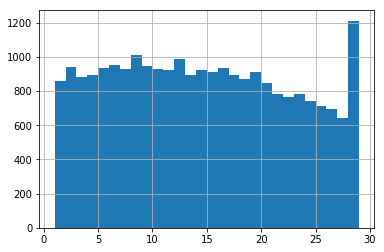

In [133]:
emp_data['seniority'].hist(bins=np.arange(1,40,1))

What is the distribution in salary amongst all employees?

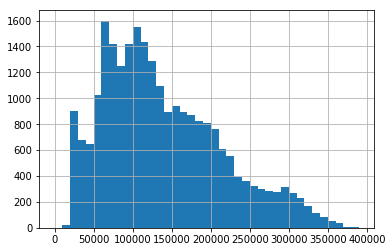

In [37]:
emp_data['salary'].hist(bins=np.arange(0,400000,10000))

Join date and quit date...

(<matplotlib.axes._subplots.AxesSubplot at 0x1a1d5b0e80>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1d5b0e80>)

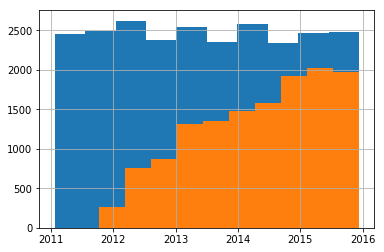

In [41]:
emp_data['join_date'].hist(), emp_data['quit_date'].hist()

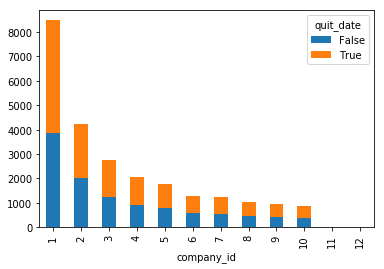

In [100]:
emp_data.groupby(['company_id', ~pd.isnull(emp_data['quit_date'])]).size().unstack().plot(kind='bar', stacked=True)

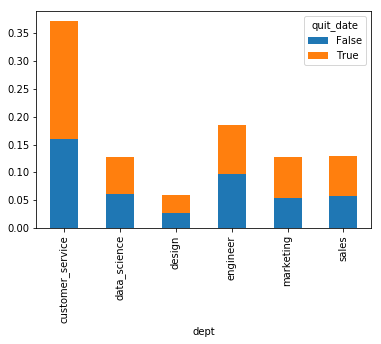

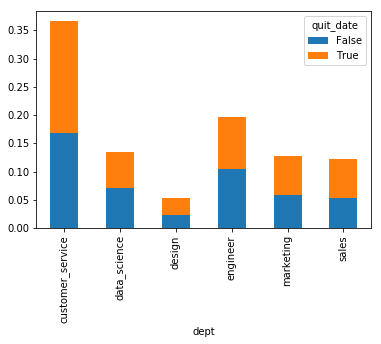

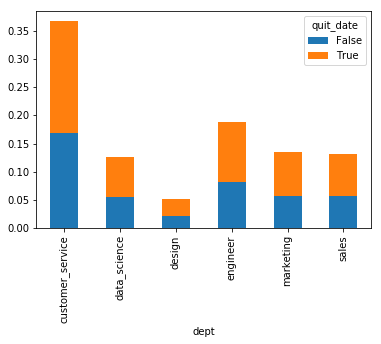

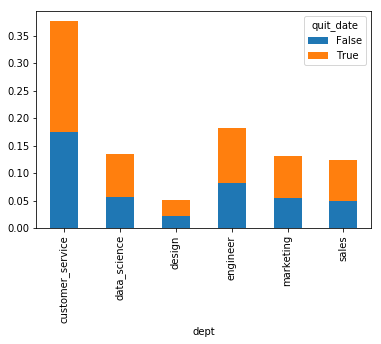

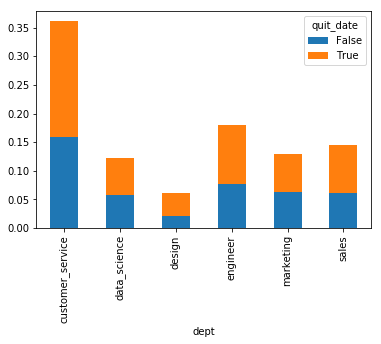

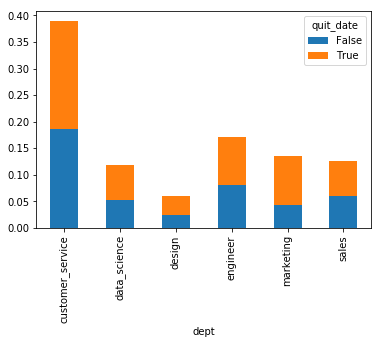

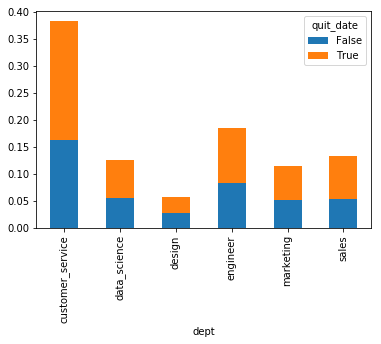

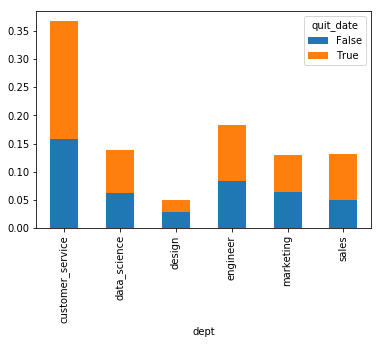

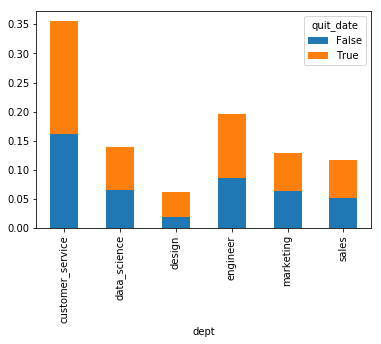

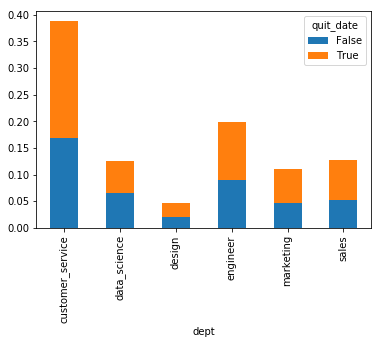

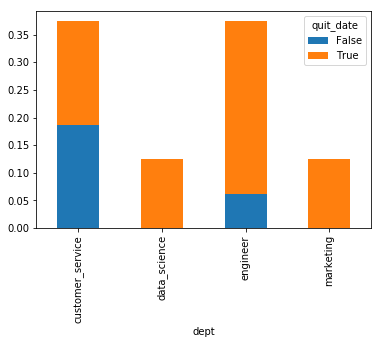

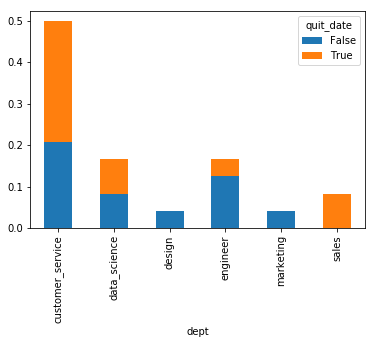

In [155]:
company_sizes = emp_data.groupby('company_id').size()
turnover_by_company_and_dept = emp_data.groupby(['company_id', ~pd.isnull(emp_data['quit_date']), 'dept']).size().divide(company_sizes).unstack(level=1)
for company_id in range(1,13):
    turnover_by_company_and_dept.loc[company_id].plot(kind='bar', stacked=True)

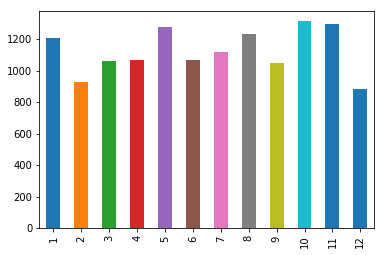

In [17]:
emp_data[~(pd.isnull(emp_data['quit_date']))].loc[:, 'quit_date'].apply(lambda x: x.month).value_counts().sort_index().plot.bar()

In [86]:
def calc_tenure(df):
    return (df['quit_date'] - df['join_date']).days // 30

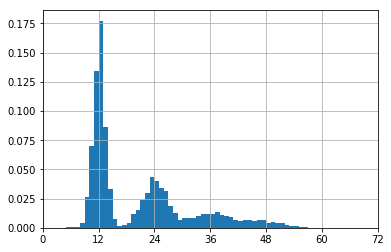

In [88]:
ax = emp_data[~(pd.isnull(emp_data['quit_date']))].apply(calc_tenure, axis=1).hist(bins=np.arange(1,140,1), density=True)
ax.set_xticks(np.arange(0,12*12,12))
ax.set_xlim(0,72);

# Company 1

In [83]:
c1_quit = emp_data[(emp_data['company_id'] == 1) & ~(pd.isnull(emp_data['quit_date']))]
c1_stay = emp_data[(emp_data['company_id'] == 1) & (pd.isnull(emp_data['quit_date']))]